In [1]:
# Module importieren

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split

from scipy.stats import norm

In [29]:
# Daten einlesen in pd

data = pd.read_csv("umfragedaten_v1_an-1636985768.csv")
data.head()

,ID,GESCHL,GEBJAHR,BERUFSTAETIG,ARBEITSSTD,ARZTBES,RAUCH,GRO,GEW,SCHULABSCHLUSS,SCHULABSCHLUSS_V,SCHULABSCHLUSS_M,HOE_ABSCHLUSS,HOE_ABSCHLUSS_V,HOE_ABSCHLUSS_M,NETTO,ZUFR
0,1359,WEIBLICH,1967.0,NICHT ERWERBSTAETIG,NaN,1.0,JA,162.0,79.0,MITTLERE REIFE,MITTLERE REIFE,HOCHSCHULREIFE,LEHRE,"GEWERBL.,LANDW.LEHRE","MEISTER, TECHNIKER",475.0,10.0
1,2455,WEIBLICH,1964.0,HAUPTBERUFL.HALBTAGS,30.0,1.0,NEIN,165.0,59.0,MITTLERE REIFE,"VOLKS-,HAUPTSCHULE","VOLKS-,HAUPTSCHULE",LEHRE,"MEISTER, TECHNIKER",KAUFMAENNISCHE LEHRE,780.0,9.0
2,200,MAENNLICH,1980.0,NICHT ERWERBSTAETIG,NaN,3.0,NEIN,166.0,86.0,HOCHSCHULREIFE,HOCHSCHULREIFE,HOCHSCHULREIFE,HOCHSCHULABSCHLUSS,HOCHSCHULABSCHLUSS,HOCHSCHULABSCHLUSS,NaN,8.0
3,1280,MAENNLICH,1968.0,HAUPTBERUFL.GANZTAGS,50.0,0.0,NEIN,180.0,95.0,FACHHOCHSCHULREIFE,MITTLERE REIFE,MITTLERE REIFE,FACHHOCHSCHULABSCHL.,KAUFMAENNISCHE LEHRE,KAUFMAENNISCHE LEHRE,NaN,8.0
4,2384,WEIBLICH,1995.0,NICHT ERWERBSTAETIG,NaN,1.0,NEIN,161.0,46.0,NOCH SCHUELER,MITTLERE REIFE,"VOLKS-,HAUPTSCHULE",NOCH SCHUELER,"GEWERBL.,LANDW.LEHRE","GEWERBL.,LANDW.LEHRE",NaN,7.0


In [30]:
# selektieren der Spalte GESCHL und NETTO

geschl_netto = data[["GESCHL", "NETTO"]]
print(geschl_netto.head())

      GESCHL  NETTO
0   WEIBLICH  475.0
1   WEIBLICH  780.0
2  MAENNLICH    NaN
3  MAENNLICH    NaN
4   WEIBLICH    NaN


In [31]:
# Data Wrangling 
geschl_netto = geschl_netto.dropna()
geschl_netto["GESCHL"] = geschl_netto["GESCHL"].map({"WEIBLICH":0, "MAENNLICH":1})
geschl_netto

,GESCHL,NETTO
0,0,475.0
1,0,780.0
6,1,4000.0
7,1,400.0
8,1,1100.0
...,...,...
3465,1,2000.0
3466,0,130.0
3467,1,1500.0
3469,0,1300.0


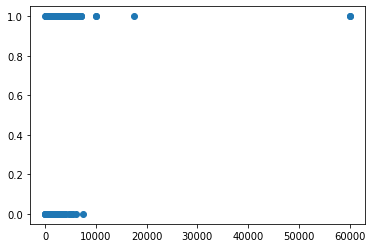

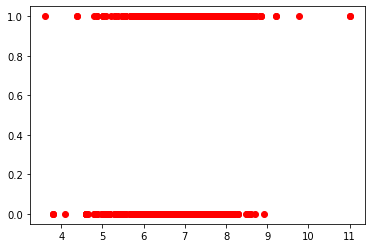

In [40]:
# X und Y Werte definieren
x = geschl_netto["NETTO"].values.reshape(-1,1)
y = geschl_netto["GESCHL"].values

# Scatterplot
plt.scatter(x,y)
plt.show()

x = np.log(x)
plt.scatter(x, y, c = "r")
plt.show()

In [42]:
# Train und Test daten erstellen

train, test = train_test_split(geschl_netto, test_size = 0.2)

x_train, y_train = train["NETTO"].values.reshape(-1,1), train["GESCHL"].values
x_test, y_test = test["NETTO"].values.reshape(-1,1), test["GESCHL"].values

In [43]:
# Logistisches Modell erstellen

geschl_netto_model = LogisticRegression().fit(x_train, y_train)

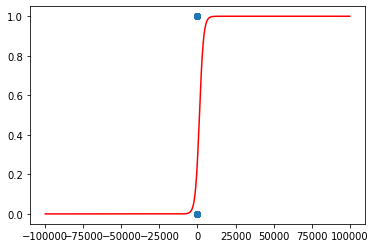

In [47]:
# plotten
x_values = np.linspace(-100000, 100000, 1000).reshape(-1,1)
y_values = geschl_netto_model.predict_proba(x_values)[:,1]

plt.scatter(x,y)
plt.plot(x_values, y_values, c = "r")
plt.show() 

In [ ]:
# Kack Date